In [19]:
import pandas as pd
import seaborn as sns
import numpy as np

# Generate training data

In [26]:
num_features = 1000
num_data = 20

In [27]:
features = np.random.normal(size=(num_features,num_data))

In [31]:
df = pd.DataFrame()
for i in range(num_features):
    df['x_{}'.format(i)] = features[i]

In [32]:
df['y'] = np.random.randint(2,size=num_data)

In [33]:
df.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_991,x_992,x_993,x_994,x_995,x_996,x_997,x_998,x_999,y
0,-0.758268,0.733332,-0.216755,2.437540,-0.424452,-0.873683,-0.415759,-0.373350,-1.896155,-1.604126,...,-1.868494,-0.210578,-0.452361,0.740867,-0.634294,-0.613191,1.178419,-1.633131,-1.366668,1
1,0.499545,1.715791,0.228466,-0.364907,-0.177097,-0.026455,-0.954352,0.511370,1.418401,-2.951762,...,-0.565373,-0.416115,0.486722,-0.393259,0.364048,0.341979,1.345322,-1.272521,0.872826,1
2,0.002474,0.767844,-0.206633,0.057876,-0.064253,0.212192,2.308302,0.328050,0.396139,-0.881282,...,0.893318,-0.516983,0.900057,-3.153486,-0.710294,-1.210022,0.586816,-1.116137,0.752819,0
3,-0.180345,1.224257,-1.373010,0.046975,1.768243,-2.229293,-1.160698,0.853327,-1.225633,1.896572,...,1.010621,-1.995990,-1.634226,-0.009191,-0.006330,-0.399502,0.260885,0.906520,0.362111,1
4,-0.542886,0.040102,0.682495,1.051705,-0.236169,0.226137,0.062418,0.977017,0.559717,0.212490,...,-0.061105,0.895092,0.197777,0.936848,-0.472660,0.257669,1.122302,1.729031,0.337699,0


# A simple stump tree model

In [35]:
flist = []
for i in range(num_features):
    flist += ['x_{}'.format(i)]

In [66]:
X = np.array(df[flist])

In [67]:
y = np.array(df['y'])

In [68]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X, y)

[Text(167.4, 163.07999999999998, 'X[515] <= 0.664\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(83.7, 54.360000000000014, 'gini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]')]

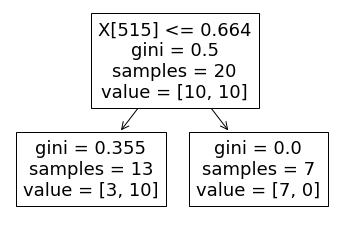

In [69]:
tree.plot_tree(clf)

In [70]:
print("Training accuracy:", (clf.predict(X)==y).mean())

Training accuracy: 0.85


# Correct way of cross validation

In [71]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state = 12)
kf.get_n_splits(X)

5

In [72]:
# Applying previous predictor
for train_idx, test_idx in kf.split(X):
    print(train_idx, test_idx)
    print("Training accuracy:", (clf.predict(X[train_idx])==y[train_idx]).mean())
    print("Testing accuracy:", (clf.predict(X[test_idx])==y[test_idx]).mean())

[ 0  1  2  3  4  5  6  8 10 11 12 14 15 16 17 18] [ 7  9 13 19]
Training accuracy: 0.8125
Testing accuracy: 1.0
[ 0  1  2  3  4  5  6  7  9 11 12 13 15 17 18 19] [ 8 10 14 16]
Training accuracy: 0.8125
Testing accuracy: 1.0
[ 0  2  3  6  7  8  9 10 11 12 13 14 15 16 17 19] [ 1  4  5 18]
Training accuracy: 0.875
Testing accuracy: 0.75
[ 1  2  4  5  6  7  8  9 10 11 13 14 16 17 18 19] [ 0  3 12 15]
Training accuracy: 0.8125
Testing accuracy: 1.0
[ 0  1  3  4  5  7  8  9 10 12 13 14 15 16 18 19] [ 2  6 11 17]
Training accuracy: 0.9375
Testing accuracy: 0.5


In [63]:
for train_idx, test_idx in kf.split(X):
    print(train_idx, test_idx)
    clf = tree.DecisionTreeClassifier(max_depth=1)
    clf = clf.fit(X[train_idx], y[train_idx])
    print("Training accuracy:", (clf.predict(X[train_idx])==y[train_idx]).mean())
    print("Testing accuracy:", (clf.predict(X[test_idx])==y[test_idx]).mean())

[ 0  1  2  3  4  5  6  8 10 11 12 14 15 16 17 18] [ 7  9 13 19]
Training accuracy: 0.9375
Testing accuracy: 0.25
[ 0  1  2  3  4  5  6  7  9 11 12 13 15 17 18 19] [ 8 10 14 16]
Training accuracy: 0.875
Testing accuracy: 0.75
[ 0  2  3  6  7  8  9 10 11 12 13 14 15 16 17 19] [ 1  4  5 18]
Training accuracy: 0.9375
Testing accuracy: 0.0
[ 1  2  4  5  6  7  8  9 10 11 13 14 16 17 18 19] [ 0  3 12 15]
Training accuracy: 1.0
Testing accuracy: 0.25
[ 0  1  3  4  5  7  8  9 10 12 13 14 15 16 18 19] [ 2  6 11 17]
Training accuracy: 0.9375
Testing accuracy: 0.5
